In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

In [2]:
import numpy as np
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import Plot
import os
import pandas as pd
# import random
import matplotlib.pyplot as plt

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

##### Enabling R extensions

In [5]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [6]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [7]:
import sys, os

In [8]:
sys.path

['/home/jdurand/usr/local/openalea',
 '/home/jdurand/mambaforge/envs/openalea/lib/python310.zip',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages/OpenAlea.SequenceAnalysis-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [9]:
sys.path.append(".." + os.sep + "tutorials")

In [10]:
from openalea.seqint import model

In [11]:
import graphviz

In [12]:
import numpy as np

from Utils import *
from Code.amlseq2R import *

In [13]:
print(os.getcwd())

/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/tutorials


In [14]:
home_dir = "./"
base_path = home_dir
ressource_path = base_path
os.chdir(base_path)

In [15]:
os.listdir(ressource_path + os.sep )

['seq1v_5s_LR_init.hsmc',
 'sim_v_5s_LR.hsmc',
 'Code',
 'Utils',
 'sequences.ipynb',
 '.ipynb_checkpoints']

**Read an existing HSMC model**

In [16]:
from openalea.sequence_analysis import HiddenSemiMarkov

model_file = "sim_v_5s_LR.hsmc"
#model_file = "init_v_5s_LR.hsmc"
hmsc = HiddenSemiMarkov(ressource_path + os.sep + model_file)

**Simulate sequences**

In [17]:
from openalea.sequence_analysis import Simulate

In [18]:
nb_seq = 10
seq_length = 100
seq = hmsc.simulation_nb_sequences(nb_seq, seq_length, True)


N.o. initial states in parallel: 1


In [19]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[0, 4, 0, 0], [0, 0, 0, 0], [0, 4, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 4, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 2, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 1, 0, 1], [4, 3, 1, 1], [4, 0, 0, 1], [4, 3, 1, 0], [4, 2, 3, 1], [4, 2, 3, 1], [4, 3, 0, 1], [4, 2, 1, 1], [4, 3, 0, 1], [4, 2, 3, 1], [4, 3, 3, 1], [4, 3, 1, 1], [4, 3, 2, 1], [4, 3, 2, 0], [4, 3, 3, 1], [4, 2, 0, 1], [4, 1, 3, 1], [4, 3, 3, 1], [4, 3, 3, 0], [4, 1, 0, 1], [4, 3, 0, 1], [4, 0, 2, 0], [4, 3, 2, 1], [4, 3, 0, 1], [4, 3, 0, 1], [4, 2, 2, 1], [4, 3, 2, 1], [4, 3, 2, 1], [4, 3, 0, 1], [4, 3, 0, 1], [4, 3, 3, 1], [4, 2, 0, 0], [4, 2, 3, 1], [4, 3, 2, 1], [4, 3, 0, 1], [4, 3, 2, 1], [4, 3, 1, 0], [4, 2, 3, 1], [4, 3, 1, 1], [4, 2, 3, 1], [4, 3, 2, 1], [4, 3, 3, 1], [4, 3, 3, 1], [4, 1, 3, 0], [4, 3, 2, 1], [4, 3, 0, 1], [4, 2, 2, 1], [4, 2, 3, 1], [4, 3, 2, 0], [4, 2, 3, 0], [4, 0

**Perform operations on sequences**

In [20]:
# Discard variable 1 (state)
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

In [21]:
# Variable 1: lateral shoot type
obs.plot("Intensity", 0)
plt.show()

/home/jdurand/mambaforge/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg/openalea/stat_tool/output.py:804: UserWarning: Cannot use new plotter. Use old style plot.
  warnings.warn("Cannot use new plotter. Use old style plot.")


ArgumentError: Python argument types in
    _MarkovianSequences.plot_write(_MarkovianSequences, str, str, list)
did not match C++ signature:
    plot_write(sequence_analysis::MarkovianSequences, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > prefix, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > title)

In [22]:
# Variable 2: lateral flowering
obs.plot("Intensity", 1)
plt.show()

ArgumentError: Python argument types in
    _MarkovianSequences.plot_write(_MarkovianSequences, str, str, list)
did not match C++ signature:
    plot_write(sequence_analysis::MarkovianSequences, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > prefix, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > title)

In [23]:
# Variable 3: terminal flowering
obs.plot("Intensity", 2)
plt.show()

ArgumentError: Python argument types in
    _MarkovianSequences.plot_write(_MarkovianSequences, str, str, list)
did not match C++ signature:
    plot_write(sequence_analysis::MarkovianSequences, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > prefix, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > title)

## HSCM re-estimation

In [24]:
# Discard state variable
seq1v = seq.select_variable([2, 3, 4], True)

In [25]:
nb_states = 5
init_file = base_path + os.sep + "seq1v_" + str(nb_states) + "s_LR_init.hsmc"

In [26]:
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import HiddenSemiMarkov

In [27]:
# Conversion dos2unix file if needed
try:
    hmsc_init = HiddenSemiMarkov(init_file)
except:
     dos2unix(init_file, init_file)
hmsc_init = HiddenSemiMarkov(init_file)


### Estimate HSCM with default initialization


Left-right model

In [28]:
hsmc1 = Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "LeftRight", Nbiteration=300)   
print(hsmc1)

0


ArgumentError: Python argument types in
    _MarkovianSequences.hidden_semi_markov_estimation_model(_MarkovianSequences, str, int, bool, float, bool, EstimatorHSMType, bool, bool, int, ClusterType)
did not match C++ signature:
    hidden_semi_markov_estimation_model(sequence_analysis::MarkovianSequences, stat_tool::process_type, int, bool, double, bool, bool, stat_tool::censoring_estimator, bool, bool, int, stat_tool::duration_distribution_mean_estimator tobedone)

Irreducible model

### Plot model and data characteristics.    
Syntax: hsmc1.extract(int type, int variable, int value)    
types correspond to SELF_TRANSITION , OBSERVATION , INTENSITY , FIRST_OCCURRENCE , RECURRENCE_TIME , SOJOURN_TIME ,   INITIAL_RUN , FINAL_RUN , NB_RUN , NB_OCCURRENCE ,  COUNTING , LENGTH , SEQUENCE_CUMUL , SEQUENCE_MEAN

In [29]:
# Type 1: emission distribution,  Variable 1: lateral shoot type, State 4
hsmc1.extract(1, 1, 4).plot()
plt.show()

NameError: name 'hsmc1' is not defined

In [30]:
# hsmc1.extract(2, 1, 4).plot()

NameError: name 'hsmc1' is not defined

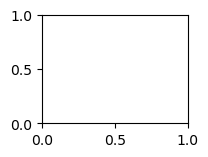

In [31]:
# All emission distributions for variable 1
plt.figure(1)
for i in range(5):
    plt.subplot(3,3, i+1)
    hsmc1.extract(1, 1, i).plot()


### TODO: states 3 and 4 are swapped?

NameError: name 'hsmc1' is not defined

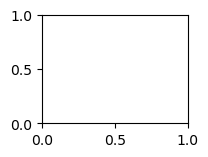

In [32]:
# All emission distributions for variable 2
plt.figure(1)
for i in range(5):
    plt.subplot(3,3, i+1)
    hsmc1.extract(1, 2, i).plot()

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300))  


Discard state sequence computations (entropy, Viterbi?)

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, StateSequence=False))

Using the MCEM option would cause the library to crash

Using the Equilibrium option (stationary) would cause the library to crash

Change option in means of initial occupancy distributions

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, InitialOccupancyMean=20))

Change option in estimating occupancy distributions (censoring, etc.?)

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, Estimator="KaplanMeier"))

Change option in state sequence restoration (Viterbi vs. smoothing)

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, StateSequences="ForwardBackward"))

Change option in estimating occupancy distributions

In [ ]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, OccupancyMean="Estimated"))

Other options in estimate

In [ ]:
help(Estimate)

### Estimate HSCM with manual initialization from file

In [ ]:
hsmc1 = Estimate(seq1v, "HIDDEN_SEMI-MARKOV", hmsc_init, NbIteration=300)
print(hsmc1)

### Export states


In [ ]:
from openalea.sequence_analysis import ExtractData
seg = ExtractData(hsmc1) # Data and segmentation

In [ ]:
# Restored states are added as the first variable to seq_1v, see
print(seg[0][0:10])
print(seq1v[0][0:10])

In [ ]:
seg_dir = "Results"

In [ ]:
if not os.path.exists(seg_dir): 
    # if the seg_dir directory is not present  
    # then create it. 
    os.makedirs(seg_dir) 

In [ ]:
# Export into file

seg_file = "seq1v_" + str(nb_states) + "s_LR_segm.seq"
output_Rpyseq1_file = seg_dir + os.sep + seg_file[0:-4] + ".csv"
WriteRSequence(seg, output_Rpyseq1_file, RestoredStatesHeader())

Create DataFrame

In [ ]:
df = pd.read_csv(output_Rpyseq1_file, index_col=0, comment="#", usecols=range(6))
var_names = [' axillary shoot type',' lateral flowering', ' terminal flowering']
df = df[var_names]

In [ ]:
# Add sequence identifiers to DF
seqid = []
for i in range(len(seq1v)):
    seqid += [i+1] * len(seq1v[i])
seqid
df["seqid"] = seqid

In [ ]:
from seqint.pyseq_data_frame import PySeqDataFrame
pyd = PySeqDataFrame(df, seq_index_name="seqid")
pyd.seq_index_name
pyd.col_to_seq(var_names)
seqc = pyd.get_input_sequence(var_names)

In [ ]:
assert(str(seqc[0]) == str(seq1v[0]))

### Embed HSCM within Model class for automatic parameter visualization


In [ ]:
output_path = base_path + os.sep + "Results" 
model = Model(pyd, output_process_name=var_names, init_hsmc_file=init_file, output_path=output_path)
model.iterate_em(300)
model.hsmm.save(os.path.join(output_path, 'seq1v_' + str(nb_states) + 's_LR.hsmc'))
model.print_hsmc_file(verbose=False)

In [ ]:
from seqint import html_report

output_path = "." + os.sep + "tmp_dir"

if not os.path.exists(output_path):
    os.mkdir(output_path)
    
report = html_report.Htmlreport(model, output_path=output_path)
report.make_html(True)

*Removing some garbage files*

In [ ]:
report_prefix = report._html_report_file_path[0:-11]
report_prefix = report_prefix.split("/")[2]
import glob
for f in glob.glob("." +os.sep +  "*.dat"):
    os.remove(f)

In [ ]:
print("Report printed in " + str(report._html_report_file_path))

In [ ]:
import shutil
#shutil.rmtree(tempdir)

In [ ]:
import dill
# dill.dump_session('notebook_env.db')